# Author: Elie Kawas
- Date Created: 7th June 2024
- Date Modified: 19th June 2024

# import and impute data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
SEED = 42
np.random.seed(SEED)
pd.set_option('display.max_columns',50)
import statsmodels.tsa.api as tsa
from scipy.signal import find_peaks

In [ ]:
import time

start_time = time.time()

# data read and datetime setting

In [ ]:
folder_path = '/content/drive/MyDrive/Time Series Analysis-Dojo/Crimes_-_2001_to_Present_20240604.csv'
df = pd.read_csv(folder_path)
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"


In [ ]:
df.shape

(8074782, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8074782 entries, 0 to 8074781
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')





In [ ]:
df.isna().sum().sum()

1685914

In [ ]:
df = df.fillna(method='ffill')

df.isna().sum().sum()

5

In [ ]:
df.dropna(inplace=True)

In [ ]:
og_df = df.copy()

In [ ]:
df = df.set_index("Date")
df = df.sort_index()
df.head(3)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,9755238,HX403557,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,1170359.0,1921592.0,2001,08/17/2015 03:03:40 PM,41.940339,-87.649278,"(41.940339157, -87.649278064)"
2001-01-01,9755245,HX403558,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,1153289.0,1892164.0,2001,08/17/2015 03:03:40 PM,41.859943,-87.712799,"(41.859942585, -87.71279851)"
2001-01-01,9755147,HX403543,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,1173592.0,1843703.0,2001,08/17/2015 03:03:40 PM,41.726534,-87.639707,"(41.726533631, -87.639707326)"


In [ ]:
end_time = time.time()
duration = end_time - start_time
print("Duration:", duration/60)


Duration: 1.9610871195793151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8074781 entries, 2001-01-01 00:00:00 to 2024-05-27 00:00:00
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
dtypes: bool(2), float64(7), int64(3), object(9)


# Speculations and basic visualizations

## 1 - Comparing Police Districts, Highest crimes count vs Lowest crimes count

In [ ]:
crime_2022 = df[df['Year'] == 2022]
crime_2022.head(3)


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,13002739,JG176336,014XX W 74TH ST,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,734,7.0,17.0,67.0,17,1148293.0,1921289.0,2022,05/13/2023 03:41:13 PM,41.939962,-87.730386,"(41.939962243, -87.730386231)"
2022-01-01,12701677,JF245883,027XX W GRANVILLE AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2413,24.0,40.0,2.0,26,1157125.0,1941047.0,2022,01/03/2023 03:40:27 PM,41.994004,-87.697387,"(41.994004228, -87.697386718)"
2022-01-01,13335633,JH112621,066XX S NORMAL BLVD,5000,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,APARTMENT,False,False,722,7.0,6.0,68.0,26,1175853.0,1834301.0,2022,01/12/2024 03:40:54 PM,41.700683,-87.631706,"(41.700682939, -87.631705734)"


In [ ]:
district_max = df['District'].value_counts().idxmax()
district_max_count = df['District'].value_counts().max()

In [ ]:
district_min = df['District'].value_counts().idxmin()
district_min_count = df['District'].value_counts().min()

In [ ]:
print(f"The district with the most crimes in 2022 is {district_max} with {district_max_count} crimes.")
print(f"The district with the least crimes in 2022 is {district_min} with {district_min_count} crimes.")

The district with the most crimes in 2022 is 8.0 with 542139 crimes.
The district with the least crimes in 2022 is 21.0 with 4 crimes.


## 2 -  Crimes Across the Years

In [ ]:
crimes_years_count = df['Year'].value_counts()

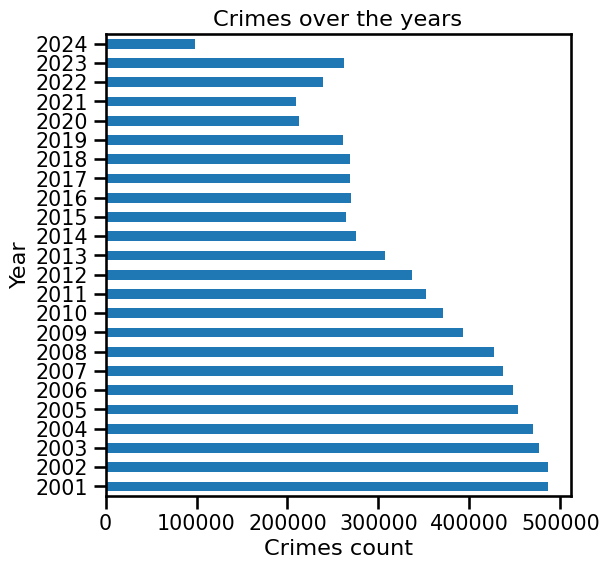

In [ ]:
ax = crimes_years_count.sort_index().plot(kind='barh',figsize=(6,6))
ax.set(title='Crimes over the years',xlabel='Crimes count',ylabel ='Year');

In [ ]:
overall_trend = "increasing" if crimes_years_count.diff().sum() > 0 else "decreasing"
print(f"The total number of crimes is {overall_trend} across the years.")

The total number of crimes is decreasing across the years.


In [ ]:
crime_type_count = df.groupby(['Year', 'Primary Type']).size()
crime_type_count

Year  Primary Type                     
2001  ARSON                                 1011
      ASSAULT                              31386
      BATTERY                              93466
      BURGLARY                             26014
      CONCEALED CARRY LICENSE VIOLATION        1
                                           ...  
2024  ROBBERY                               3549
      SEX OFFENSE                            495
      STALKING                               164
      THEFT                                21635
      WEAPONS VIOLATION                     3139
Length: 751, dtype: int64

In [ ]:
crime_type_count= crime_type_count.unstack(fill_value=0)
crime_type_count

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,1011,31386,93466,26014,1,1776,55862,36,13241,14950,1,934,667,0,406,279,933,1637,27555,50568,0,0,0,19,2265,6,29664,6026,9,2750,8,18441,2238,204,99281,4278
2002,1032,31523,94153,25623,0,1804,55941,33,13881,13737,0,971,658,0,361,337,829,1414,25121,51789,0,0,0,26,2595,5,32601,6408,8,2457,2,18523,2173,200,98334,4281
2003,955,29477,88380,25157,0,1569,55011,44,14807,13461,0,1088,604,0,409,364,705,1311,22749,54288,0,1,0,16,3047,2,31148,6214,6,2430,2,17332,2078,247,98876,4211
2004,778,28850,87136,24564,0,1534,53164,48,15913,13257,0,1122,455,0,531,349,482,985,22805,57060,0,0,0,13,3101,9,29533,7476,9,2495,1,15978,1805,215,95464,4298
2005,691,27067,83964,25503,0,1517,54548,42,16655,13592,0,1078,453,0,615,258,389,1005,22497,56234,0,0,0,19,2909,9,28028,6124,4,2730,2,16047,1817,192,85684,4106
2006,726,25945,80666,24324,0,1438,57124,49,14505,13609,0,1368,476,0,758,276,339,1135,21818,55813,0,0,0,17,2787,9,27101,7034,4,3068,7,15969,1575,186,86241,3821
2007,712,26312,79593,24858,0,1506,53749,54,13699,14174,0,1409,448,0,677,255,329,1170,18573,54454,0,0,0,12,2919,12,26863,6087,5,3315,1,15450,1529,213,85156,3554
2008,644,25448,75930,26218,0,1509,52843,56,12310,14935,0,1199,513,0,580,261,359,912,18881,46506,0,0,0,13,2667,12,26532,5141,4,3013,0,16703,1504,190,88437,3877
2009,616,22861,68460,26767,0,1394,47725,53,10851,13883,0,991,461,0,573,231,293,746,15482,43542,0,1,0,21,2634,7,25601,3940,10,3147,0,15981,1268,168,80975,4159


In [ ]:
crime_change = crime_type_count.diff().sum()
crime_change

Primary Type
ARSON                                 -821.0
ASSAULT                             -22238.0
BATTERY                             -75560.0
BURGLARY                            -23135.0
CONCEALED CARRY LICENSE VIOLATION       63.0
CRIM SEXUAL ASSAULT                  -1776.0
CRIMINAL DAMAGE                     -44900.0
CRIMINAL SEXUAL ASSAULT                512.0
CRIMINAL TRESPASS                   -11361.0
DECEPTIVE PRACTICE                   -9180.0
DOMESTIC VIOLENCE                       -1.0
GAMBLING                              -927.0
HOMICIDE                              -475.0
HUMAN TRAFFICKING                        2.0
INTERFERENCE WITH PUBLIC OFFICER      -142.0
INTIMIDATION                          -219.0
KIDNAPPING                            -898.0
LIQUOR LAW VIOLATION                 -1556.0
MOTOR VEHICLE THEFT                 -18935.0
NARCOTICS                           -48231.0
NON - CRIMINAL                           0.0
NON-CRIMINAL                             1

---

**check which crime has a negative relationship with the change over the years**

---

In [ ]:
negative = crime_change > 0
negative_crimes = negative[negative == True]
negative_crimes

Primary Type
CONCEALED CARRY LICENSE VIOLATION    True
CRIMINAL SEXUAL ASSAULT              True
HUMAN TRAFFICKING                    True
NON-CRIMINAL                         True
OBSCENITY                            True
dtype: bool

In [ ]:
abnormal_change_crimes = crime_change[negative_crimes.index]
abnormal_change_crimes

Primary Type
CONCEALED CARRY LICENSE VIOLATION     63.0
CRIMINAL SEXUAL ASSAULT              512.0
HUMAN TRAFFICKING                      2.0
NON-CRIMINAL                           1.0
OBSCENITY                              9.0
dtype: float64

In [ ]:
print("Individual crimes with opposite trend to overall trend:")
for crime in abnormal_change_crimes.index:
    print(f"- {crime}")


Individual crimes with opposite trend to overall trend:
- CONCEALED CARRY LICENSE VIOLATION
- CRIMINAL SEXUAL ASSAULT
- HUMAN TRAFFICKING
- NON-CRIMINAL
- OBSCENITY


## 3- What cycles (seasonality) can you find in this data?

In [ ]:
crimes_ts = df.pivot_table(index='Date', columns='Primary Type', aggfunc='size', fill_value=0)
crimes_ts.head(3)

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,0,2,1,1,0,12,12,2,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,8,0,0,0,0,0,39,0,71,0
2001-01-01 00:01:00,0,0,1,1,0,9,7,0,0,18,0,0,0,0,0,0,0,0,4,0,0,0,0,0,36,0,4,0,0,0,0,0,13,0,49,0
2001-01-01 00:04:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
crimes_ts_month = crimes_ts.resample('M').sum()
crimes_ts_month.head(3)

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67,2123,6527,1934,0,162,3966,4,1192,1398,1,44,42,0,36,18,75,101,2097,4714,0,0,0,2,247,1,2800,563,0,161,2,1396,218,26,7867,337
2001-02-28,57,2029,6042,1666,0,134,3665,1,1063,1163,0,37,27,0,27,24,57,109,1785,4369,0,0,0,1,153,0,2488,426,1,173,0,1159,149,13,6669,301
2001-03-31,93,2824,7662,1832,0,149,4618,5,1141,1313,0,55,37,0,22,22,72,147,2152,4862,0,0,0,2,195,0,2837,550,0,267,2,1399,184,17,7766,345


In [ ]:
total_crime_count = crimes_ts_month.sum(axis=1)
total_crime_count.head()

Date
2001-01-31    38121
2001-02-28    33788
2001-03-31    40570
2001-04-30    40093
2001-05-31    41842
Freq: M, dtype: int64

In [ ]:
total_crime_count['2014':'2016'].idxmax()

Timestamp('2014-07-31 00:00:00')

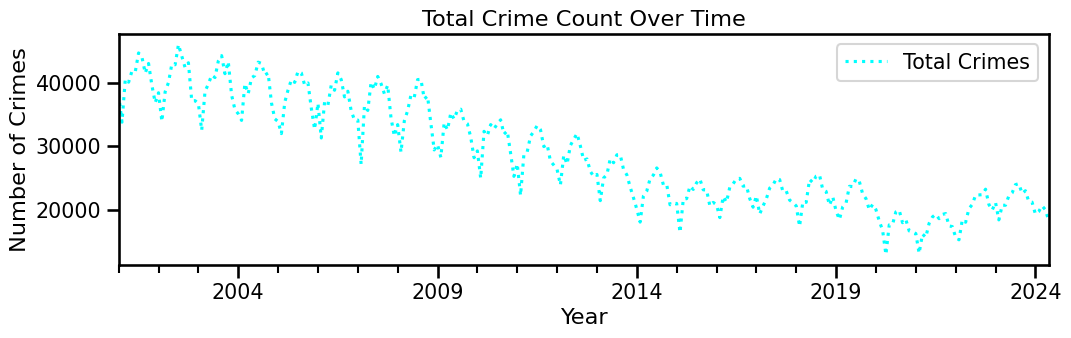

In [ ]:
plt.figure(figsize=(12, 3))
total_crime_count.plot(linestyle=':', color='cyan', label='Total Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Total Crime Count Over Time')
plt.legend()
plt.show()

In [ ]:
decomp_crime_count = tsa.seasonal_decompose(total_crime_count)

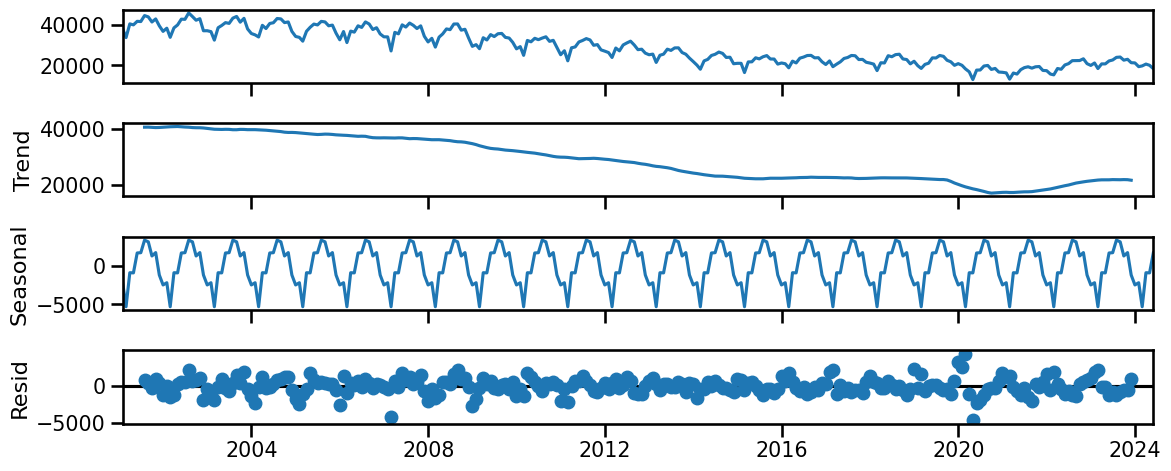

In [ ]:
fig = decomp_crime_count.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

---

the Trend is decreasing overtime

there is a seasionality in the data that we can further explore

---

In [ ]:
season14_16 = decomp_crime_count.seasonal['2014':'2016']
max_s = season14_16.max()
min_s = season14_16.min()
magnitude = max_s  - min_s
max_ids = season14_16.idxmax()
min_ids = season14_16.idxmin()

In [ ]:
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for crimes');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax


In [ ]:
peaks, props = find_peaks(season14_16, height=season14_16.max())
peak_dates = season14_16.index[peaks]
period = peak_dates[1] - peak_dates[0]

periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods


[Timedelta('365 days 00:00:00'), Timedelta('366 days 00:00:00')]

The highest crime count was 3366.27 over the norm at the date 2014-07-31 00:00:00,
 while the lowest was -5316.85 under the norm at the date 2014-02-28 00:00:00,
 which is represented in a magnitude of 8683.12 over a period of 153 days 00:00:00, 
 note that this data is represented by month and not by day


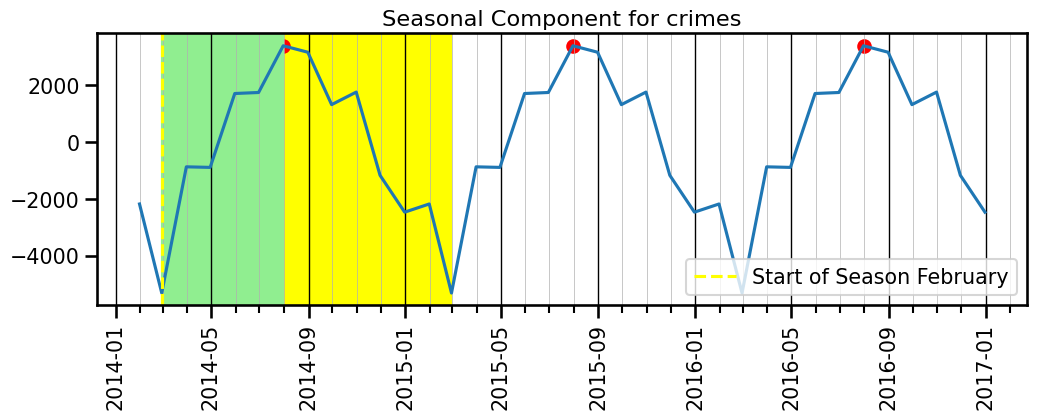

In [ ]:
fig, ax = plot_seasonal(season14_16)
season_start = season14_16.idxmin()
ax.axvspan( season_start, season_start +period, color='yellow')
ax.axvline(season_start, color='yellow', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.scatter(peak_dates, props['peak_heights'], color='red')
ax.axvspan(season14_16.idxmin(),season14_16.idxmax(), color='lightgreen')
ax.legend();


print(f"The highest crime count was {max_s:.2f} over the norm at the date {max_ids},\n while the lowest was {min_s:.2f} under the norm at the date {min_ids},\n which is represented in a magnitude of {magnitude:.2f} over a period of {max_ids - min_ids}, \n note that this data is represented by month and not by day")

In [ ]:
print(f"the seasons highest point was at the date {max_ids},\n while the lowest point was at the date {min_ids},\n which is represented in a magnitude of {magnitude:.2f} over a period of {max_ids - min_ids}, \n note that this data is represented by month and not by day")

the seasons highest point was at the date 2014-07-31 00:00:00,
 while the lowest point was at the date 2014-02-28 00:00:00,
 which is represented in a magnitude of 8683.12 over a period of 153 days 00:00:00, 
 note that this data is represented by month and not by day


# Time series ARIMA/SARIMA forecast Models

## Time Series Modeling

In [ ]:
## new imports
import datetime as dt
import matplotlib.ticker as ticker
!pip install pmdarima
import pmdarima as pm

In [ ]:
import matplotlib as mpl

from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

# Set wide fig size for plots
plt.rcParams['figure.figsize']=(12,3)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

## Fucntions

In [ ]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax

In [ ]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [ ]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [ ]:
def get_sig_lags(ts, type='ACF',  nlags=None,alpha=0.5):


    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)

    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)

    else:
        raise Exception("type must be either 'ACF' or 'PACF'")

    # Determine lags
    lags =range(len(corr_values))

    # Create a centered version of the acf_df
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")

    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags

In [ ]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)


    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)

    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()

    return fig

## perparing Time series models

### Total Crime (sum of all crime types) Forecast for the next 6 months

#### get monthly crimes data

In [ ]:
df.head(3)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,9755238,HX403557,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,1170359.0,1921592.0,2001,08/17/2015 03:03:40 PM,41.940339,-87.649278,"(41.940339157, -87.649278064)"
2001-01-01,9755245,HX403558,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,1153289.0,1892164.0,2001,08/17/2015 03:03:40 PM,41.859943,-87.712799,"(41.859942585, -87.71279851)"
2001-01-01,9755147,HX403543,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,1173592.0,1843703.0,2001,08/17/2015 03:03:40 PM,41.726534,-87.639707,"(41.726533631, -87.639707326)"


In [ ]:
ts = df.resample('M').size()
ts.head(3)

Date
2001-01-31    38121
2001-02-28    33788
2001-03-31    40570
Freq: M, dtype: int64

####  check for seasonality

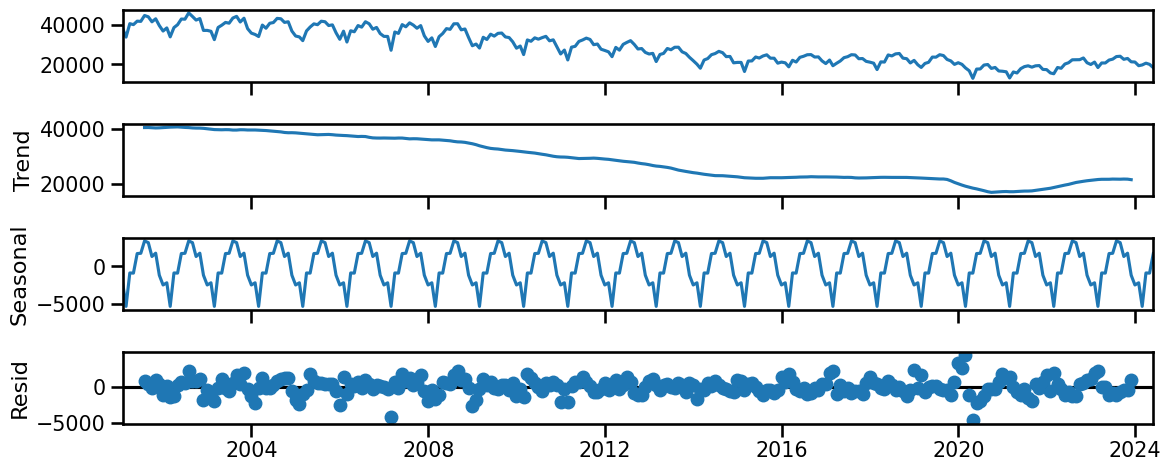

In [ ]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [ ]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()


print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ts.max()-ts.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is  8683.12 which is ~26.25% of the variation in time series.


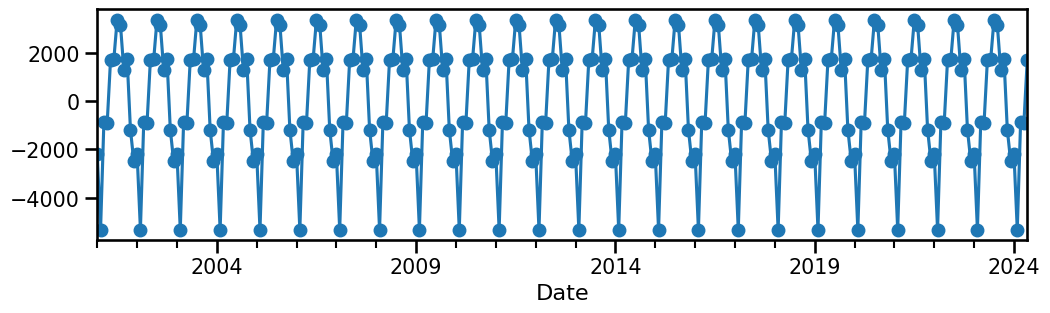

In [ ]:
seasonal = decomp.seasonal
ax = seasonal.plot(marker = 'o')

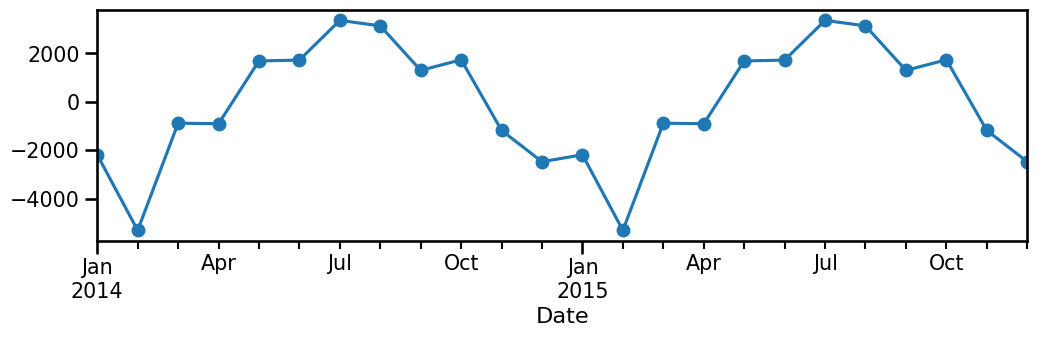

In [ ]:
ax = seasonal['2014':'2015'].plot(marker = 'o')

#### check stationary

In [ ]:
# Check for stationarity
get_adfuller_results(ts)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.198413,15,265,0.674278,0.05,False


In [ ]:
# determine d
d = ndiffs(ts)
print (f'd = {d}')
# determine D
D = nsdiffs(ts, m = 12)
print (f'D = {D}')



d = 1
D = 0


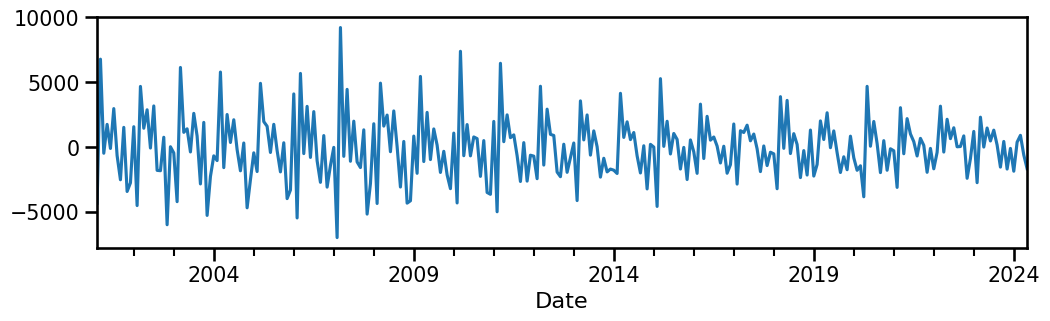

In [ ]:
ts_diff = ts.diff().dropna()
ts_diff.plot();

In [ ]:
get_adfuller_results(ts_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.321271,14,265,0.013954,0.05,True


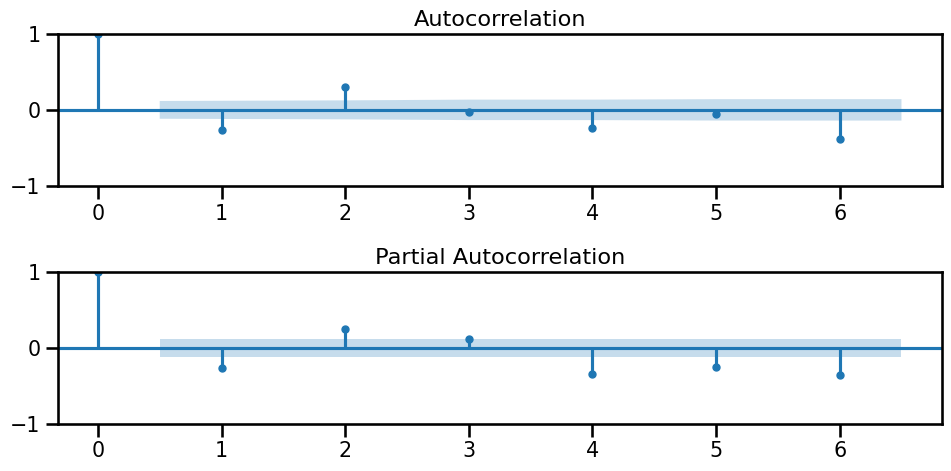

In [ ]:
plot_acf_pacf(ts_diff, annotate_seas = True, m = 12 , nlags = 6);

- Gradually decreasing for both pac and ac

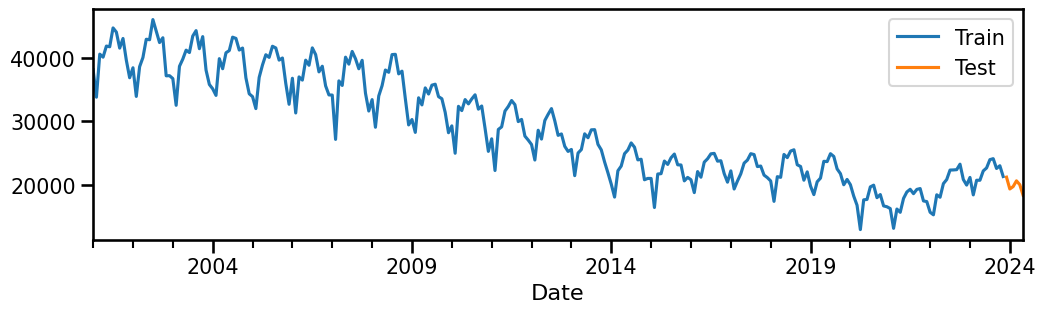

In [ ]:
train_all, test_all = train_test_split(ts, test_size=6)
ax = train_all.plot(label='Train')
test_all.plot(ax=ax, label='Test')
ax.legend();

#### Manual

In [ ]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train_all, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  275
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2401.778
Date:                          Wed, 19 Jun 2024   AIC                           4813.556
Time:                                  15:10:52   BIC                           4831.621
Sample:                              01-31-2001   HQIC                          4820.807
                                   - 11-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9960      0.027    -36.520      0.000      -1.049      -0.943
ma.L1          0.9947      0.032     31.521      0.000       0.933       1.057
ar.S.L12       0.9443      0.014     65.835      0.000       0.916       0.972
ma.S.L12      -0.7794      0.030    -25.596      0.000      -0.839      -0.720
sigma2      2.041e+06   1.88e-09   1.09e+15      0.000    2.04e+06    2.04e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.99   Jarque-Bera (JB):               189.33
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.01e+30. Standard errors may be unstable.
"""

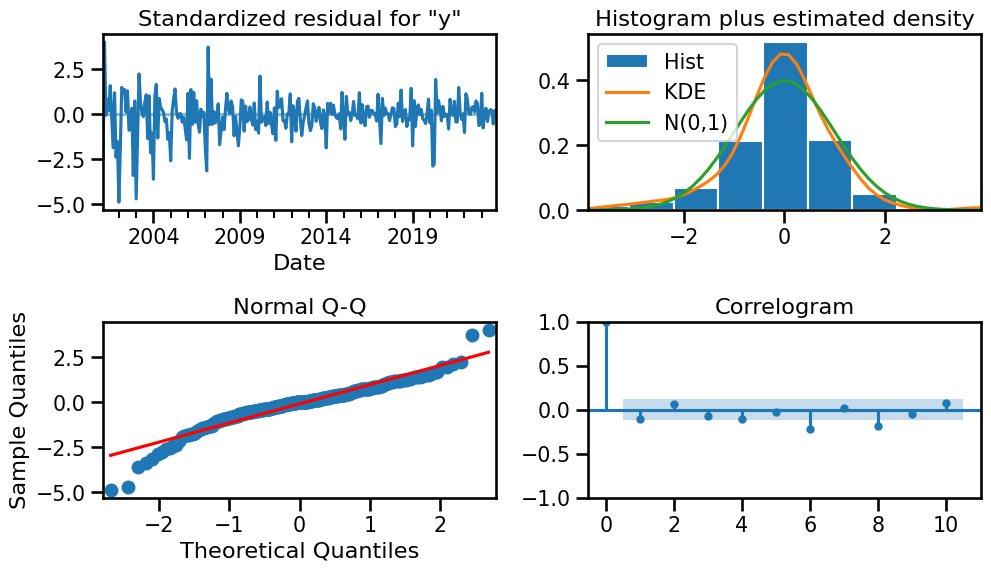

In [ ]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,286.768
- MSE = 3,557,149.860
- RMSE = 1,886.041
- R^2 = -3.276
- MAPE = 6.79%


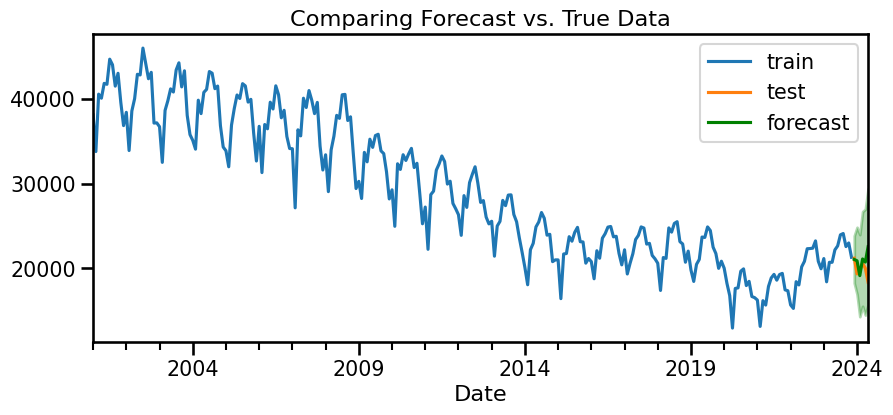

In [ ]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test_all)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train_all, test_all, forecast_df);
# Obtain metrics
regression_metrics_ts(test_all, forecast_df['mean'])

#### Auto

In [ ]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
# Let's change the max order of differencing to 2 (default is 2)
auto_model = pm.auto_arima(
    train_all,
    seasonal=True,
    m=12,
    d=1,
    D = 0,
    p=3,
    q=3,
    P=3,
    Q=3,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5059.112, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4879.691, Time=1.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4942.390, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5057.285, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5039.549, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4854.493, Time=2.03 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4877.191, Time=3.53 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4795.676, Time=0.98 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4936.919, Time=0.37 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=4864.027, Time=3.00 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=4906.581, Time=2.59 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=4820.788, Time=4.85 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4808.565, Time=1.35 sec
 ARIMA(2,1,0)(1,0,1)[12]

In [ ]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(1, 1, 0)
(1, 0, 1, 12)


In [ ]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  275
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -2392.838
Date:                              Wed, 19 Jun 2024   AIC                           4795.676
Time:                                      15:11:30   BIC                           4813.741
Sample:                                  01-31-2001   HQIC                          4802.927
                                       - 11-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -21.2564     11.545     -1.841      0.066     -43.883       1.370
ar.L1         -0.1656      0.035     -4.725      0.000      -0.234      -0.097
ar.S.L12       0.9432      0.012     78.679      0.000       0.920       0.967
ma.S.L12      -0.7713      0.026    -30.145      0.000      -0.821      -0.721
sigma2      1.884e+06   8.45e-05   2.23e+10      0.000    1.88e+06    1.88e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):               214.93
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.56e+25. Standard errors may be unstable.
"""

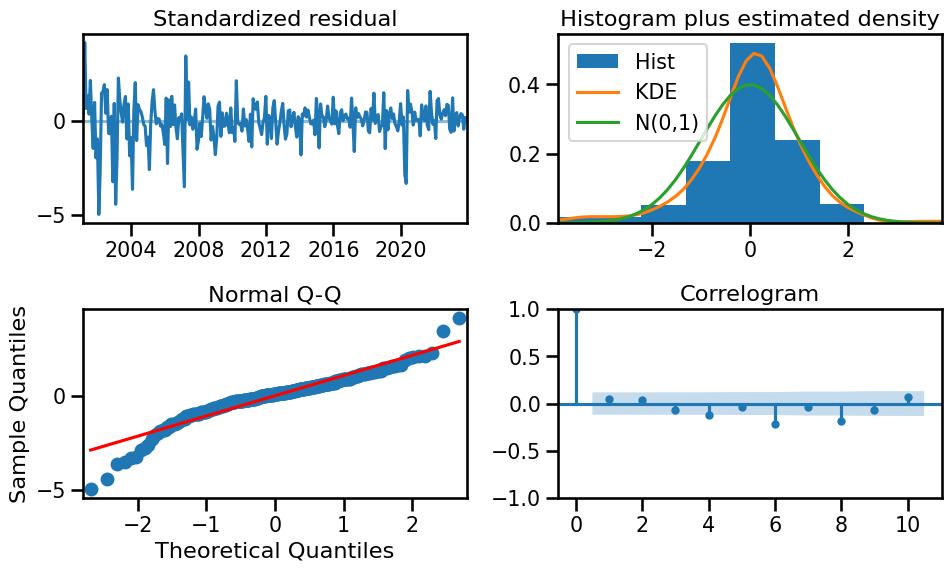

In [ ]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,280.374
- MSE = 3,563,121.546
- RMSE = 1,887.623
- R^2 = -3.283
- MAPE = 6.76%


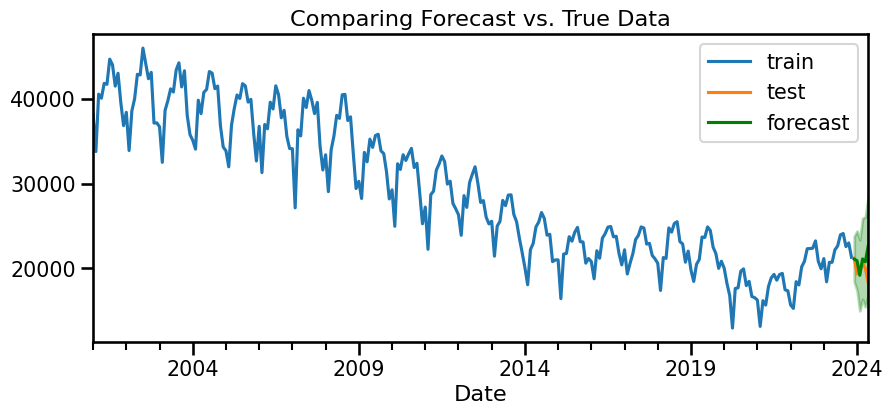

In [ ]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train_all, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test_all)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train_all, test_all, forecast_df);
# Obtain metrics
regression_metrics_ts(test_all, forecast_df['mean'])

#### Prediction forcast for All crimes model

In [ ]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(ts, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

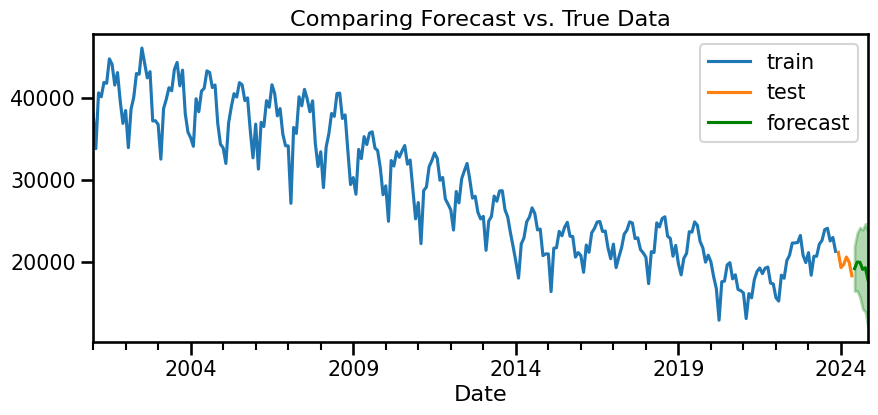

In [ ]:
# Obtain future forecasts beyond test data
forecast_df_all  = final_model.get_forecast(len(test_all)).summary_frame()
plot_forecast(train_all,test_all,forecast_df_all);

In [ ]:
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2023-12-31 00:00:00'), Timestamp('2024-05-31 00:00:00'))

In [ ]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

21080.738271816117

In [ ]:
final_value = forecast_df['mean'].iloc[-1]
final_value

22557.52422044043

In [ ]:
# 6 months predictions

forecast_df['mean']

2023-12-31    21080.738272
2024-01-31    20893.633318
2024-02-29    19170.782393
2024-03-31    21107.419461
2024-04-30    20758.184745
2024-05-31    22557.524220
Freq: M, Name: mean, dtype: float64

In [ ]:
change = final_value - starting_value
change

1476.7859486243142

In [ ]:
# Precentage change in the focast

perc_change = (change / starting_value) * 100
perc_change

7.00538059712407

### Battery Crimes Forecast for the next 6 months

#### data verification

In [ ]:
Battery = crimes_ts_month['BATTERY']
Battery.tail()

Date
2024-01-31    3278
2024-02-29    3467
2024-03-31    3667
2024-04-30    3775
2024-05-31    3719
Freq: M, Name: BATTERY, dtype: int64

In [ ]:
ts_battery = Battery
ts_battery.head(3)

Date
2001-01-31    6527
2001-02-28    6042
2001-03-31    7662
Freq: M, Name: BATTERY, dtype: int64

####  check for seasonality

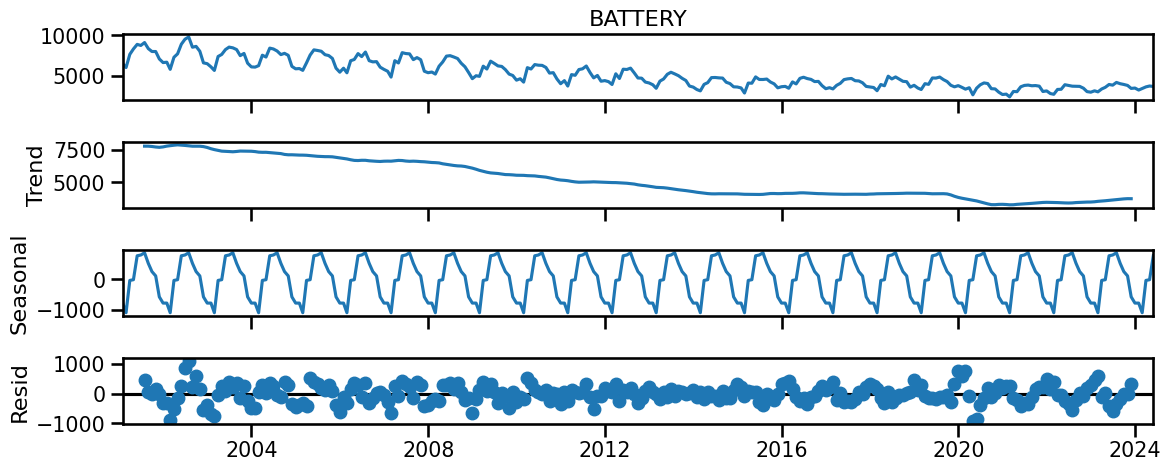

In [ ]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts_battery)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [ ]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()


print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ts_battery.max()-ts_battery.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is  1969.36 which is ~26.73% of the variation in time series.


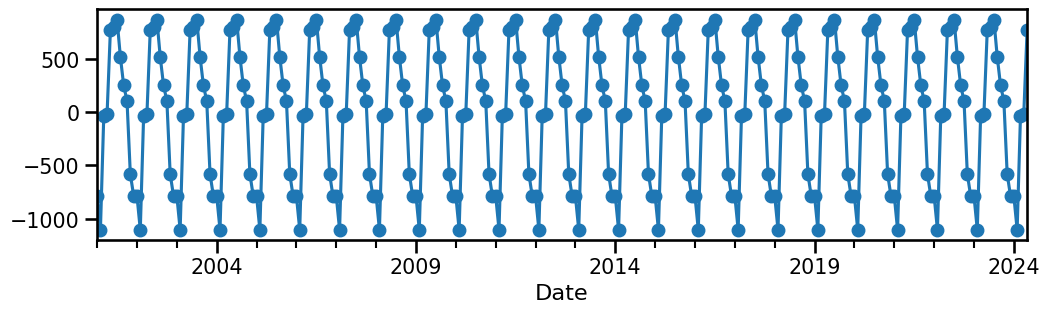

In [ ]:
seasonal = decomp.seasonal
ax = seasonal.plot(marker = 'o')

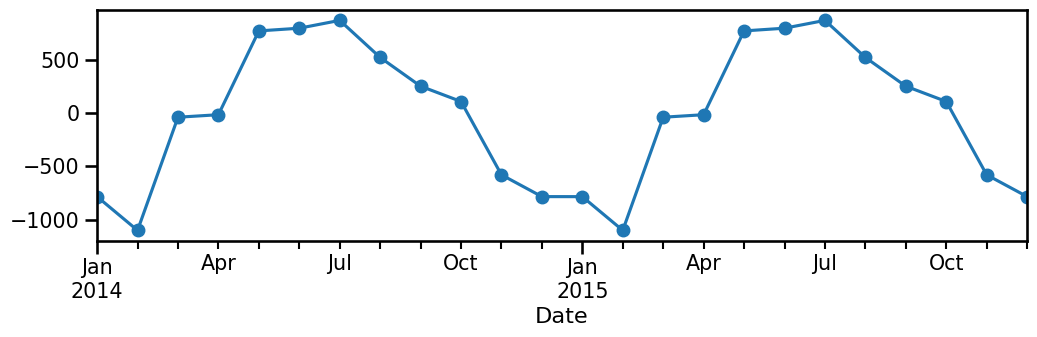

In [ ]:
ax = seasonal['2014':'2015'].plot(marker = 'o')

#### check stationary

In [ ]:
# Check for stationarity
get_adfuller_results(ts_battery)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.502113,15,265,0.532466,0.05,False


In [ ]:
# determine d
d = ndiffs(ts_battery)
print (f'd = {d}')
# determine D
D = nsdiffs(ts_battery, m = 12)
print (f'D = {D}')

d = 1
D = 0


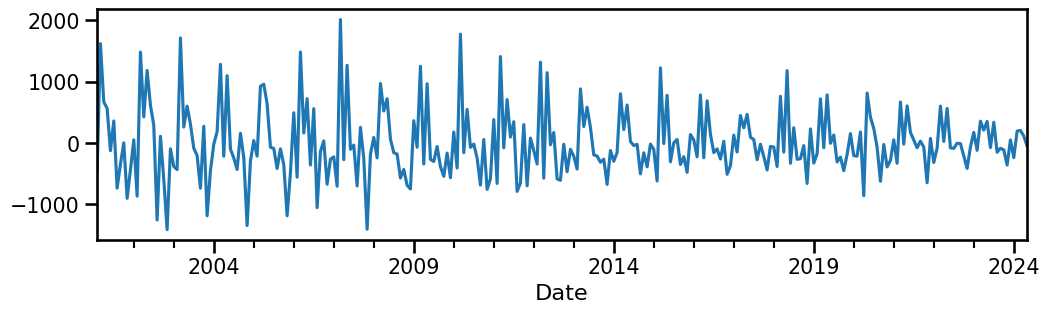

In [ ]:
ts_diff = ts_battery.diff().dropna()
ts_diff.plot();

In [ ]:
get_adfuller_results(ts_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-4.255876,14,265,0.000529,0.05,True


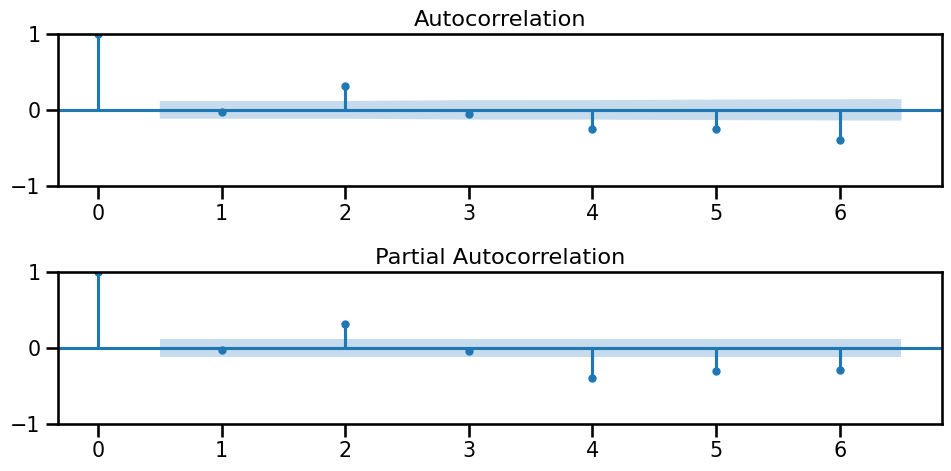

In [ ]:
plot_acf_pacf(ts_diff, annotate_seas = True, m = 12 , nlags = 6);

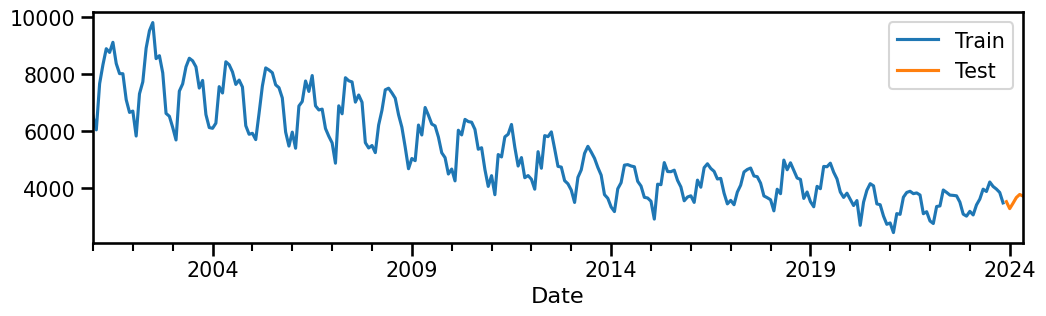

In [ ]:
train, test = train_test_split(ts_battery, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

#### Manual

In [ ]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                          BATTERY   No. Observations:                  275
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1959.671
Date:                          Wed, 19 Jun 2024   AIC                           3929.342
Time:                                  15:11:46   BIC                           3947.407
Sample:                              01-31-2001   HQIC                          3936.593
                                   - 11-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9512      0.032     29.827      0.000       0.889       1.014
ma.L1         -0.9995      0.025    -40.107      0.000      -1.048      -0.951
ar.S.L12       0.9865      0.005    179.661      0.000       0.976       0.997
ma.S.L12      -0.7341      0.052    -14.232      0.000      -0.835      -0.633
sigma2      8.471e+04   6378.173     13.281      0.000    7.22e+04    9.72e+04
===================================================================================
Ljung-Box (L1) (Q):                  21.51   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.00   Prob(JB):                         0.46
Heteroskedasticity (H):               0.39   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

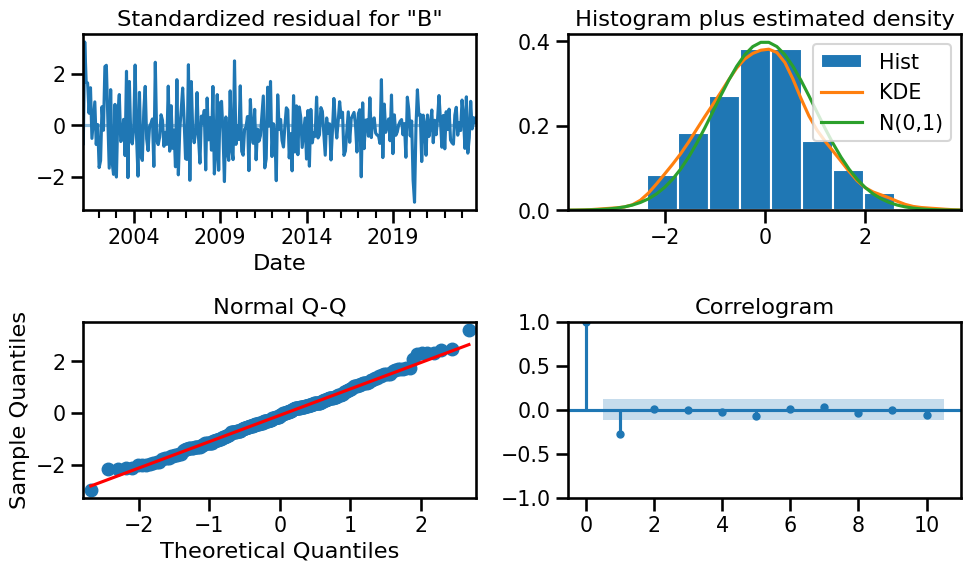

In [ ]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 190.869
- MSE = 63,820.796
- RMSE = 252.628
- R^2 = -1.230
- MAPE = 5.30%


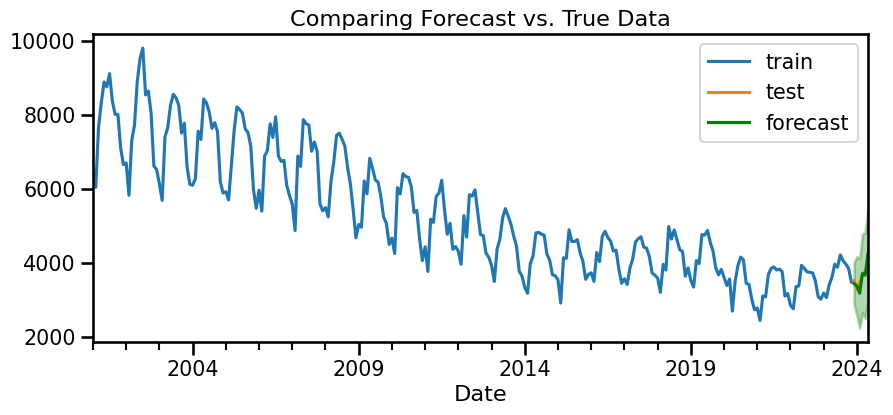

In [ ]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

#### Auto

In [ ]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
# Let's change the max order of differencing to 2 (default is 2)
auto_model_2 = pm.auto_arima(
    train,
    seasonal=True,
    m=12,
    # d=1,
    # D = 0,
    # p=3,
    # q=3,
    # P=3,
    # Q=3,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.78 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4248.681, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3986.280, Time=0.63 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4114.299, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4246.792, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4250.234, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.85 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3910.974, Time=2.65 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4112.376, Time=0.82 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3913.953, Time=5.03 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3912.994, Time=2.71 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=4075.090, Time=0.82 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3937.009, Time=1.73 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

 ARIMA(2,1,1)(1,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(3,1,1)(1,0,1)[12]             : AIC=inf, Time=nan sec

Best model:  ARIMA(2,1,0)(1,0,1)[12]          
Total fit time: 74.382 seconds


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,1)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

In [ ]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model_2.order)
print(auto_model_2.seasonal_order)

(2, 1, 0)
(1, 0, 1, 12)


In [ ]:
# Obtain summary of the best model from auto_arima
auto_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  275
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1948.302
Date:                              Wed, 19 Jun 2024   AIC                           3906.603
Time:                                      15:13:04   BIC                           3924.669
Sample:                                  01-31-2001   HQIC                          3913.854
                                       - 11-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3614      0.054     -6.701      0.000      -0.467      -0.256
ar.L2         -0.1307      0.053     -2.462      0.014      -0.235      -0.027
ar.S.L12       0.9835      0.006    171.866      0.000       0.972       0.995
ma.S.L12      -0.6793      0.055    -12.401      0.000      -0.787      -0.572
sigma2      7.727e+04   6423.487     12.029      0.000    6.47e+04    8.99e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.94   Prob(JB):                         0.27
Heteroskedasticity (H):               0.40   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

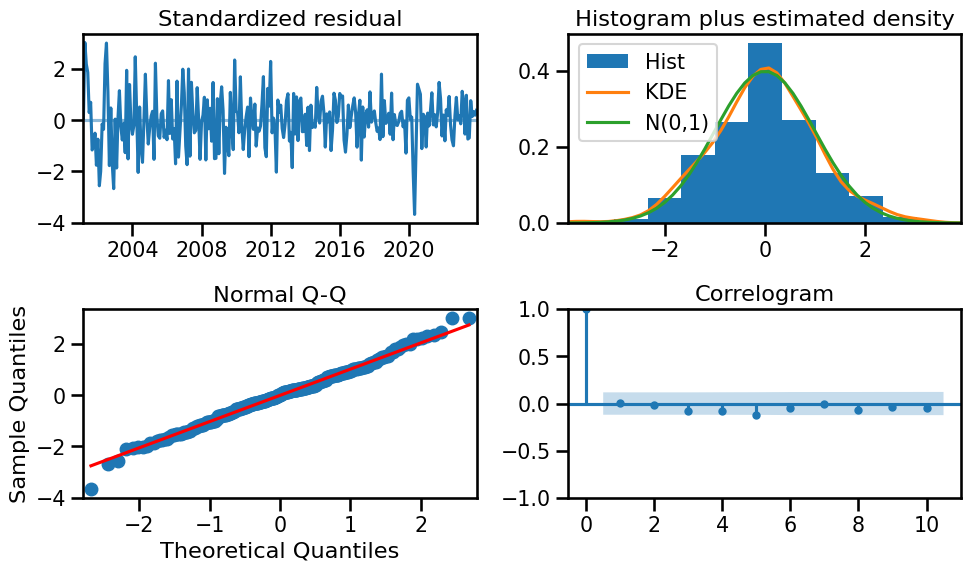

In [ ]:
# Obtain diagnostic plots
fig = auto_model_2.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 181.712
- MSE = 57,019.865
- RMSE = 238.788
- R^2 = -0.992
- MAPE = 5.05%


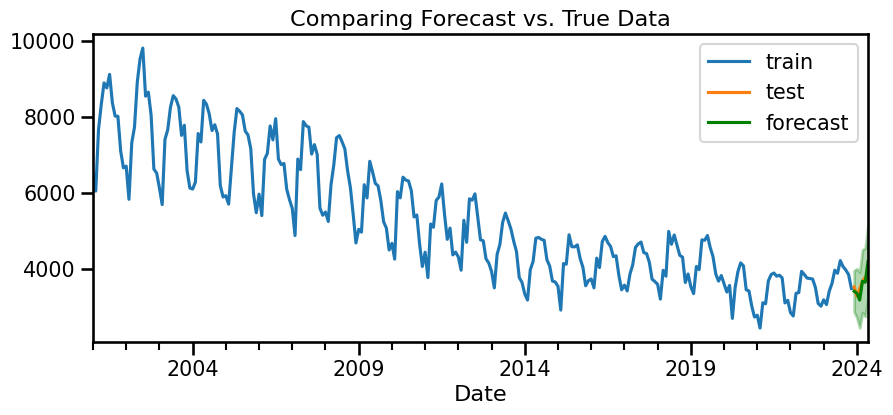

In [ ]:
# Use auto_arima parameters to fit an ARIMA
auto_model_2 = tsa.ARIMA(
    train, order=auto_model_2.order, seasonal_order=auto_model_2.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df_2 = auto_model_2.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df_2);
# Obtain metrics
regression_metrics_ts(test, forecast_df_2['mean'])

#### Prediction forcast for the Battery model

In [ ]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model_2 = tsa.ARIMA(ts_battery, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

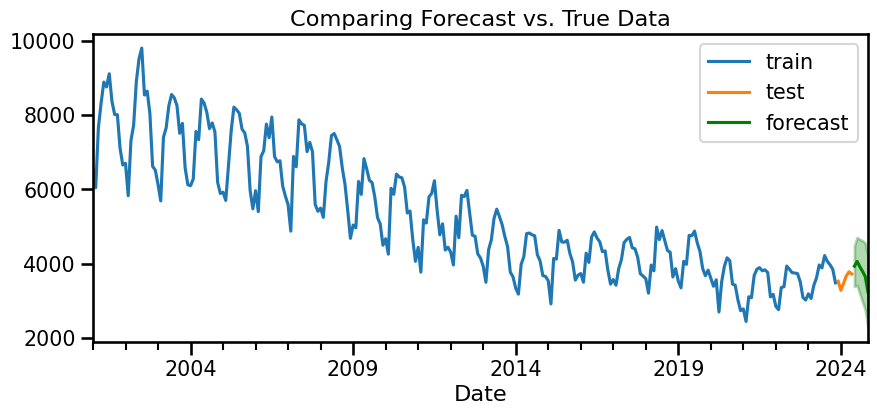

In [ ]:
# Obtain future forecasts beyond test data
forecast_df_2  = final_model_2.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df_2);

In [ ]:
forecast_df_2.index[0],forecast_df_2.index[-1]


(Timestamp('2024-06-30 00:00:00'), Timestamp('2024-11-30 00:00:00'))

In [ ]:
starting_value = forecast_df_2['mean'].iloc[0]
starting_value

3928.315296773934

In [ ]:
final_value_2 = forecast_df_2['mean'].iloc[-1]
final_value_2

3232.3053818465078

In [ ]:
# 6 mnths predictions

forecast_df_2['mean']

2024-06-30    3928.315297
2024-07-31    4055.488115
2024-08-31    3913.279714
2024-09-30    3787.446028
2024-10-31    3647.657589
2024-11-30    3232.305382
Freq: M, Name: mean, dtype: float64

In [ ]:
change_2 = final_value - starting_value
change_2

18629.208923666498

In [ ]:
# Precentage change in the focast

perc_change_2 = (change_2 / starting_value) * 100
perc_change_2

474.22896372308605

## Final Evaluation

---

For All crimes and battery crime we are observing the following

---

In [ ]:
print('(All crimes , Battery Crimes)')
print(f'1 - The Final forcasted Value of the crimes respectively as follows:{final_value:.2f},{final_value_2:.2f}   ')
print(f'2 - The Net change in values of the crimes respectively as follows: :{change:.2f},{change_2:.2f}   ')
print(f'3 - The Percentage of Change of the crimes respectively as follows: :{perc_change:.2f},{perc_change_2:.2f}')

(All crimes , Battery Crimes)
1 - The Final forcasted Value of the crimes respectively as follows:22557.52,3232.31   
2 - The Net change in values of the crimes respectively as follows: :1476.79,18629.21   
3 - The Percentage of Change of the crimes respectively as follows: :7.01,474.23


### Final Recommendations



my observations towards crimes in our data suggests that crimes are decreasing over the years generally, and specifically for battery crimes, which indicates that our security and the moral of the opoulation is advancing towards a more peacefull community, i would suggest keeping up the good work!

but regarding other observations, we have seen 5 of the crime types increasing over the years, which needs drilling down to know further information about and how we can prevent that in the state


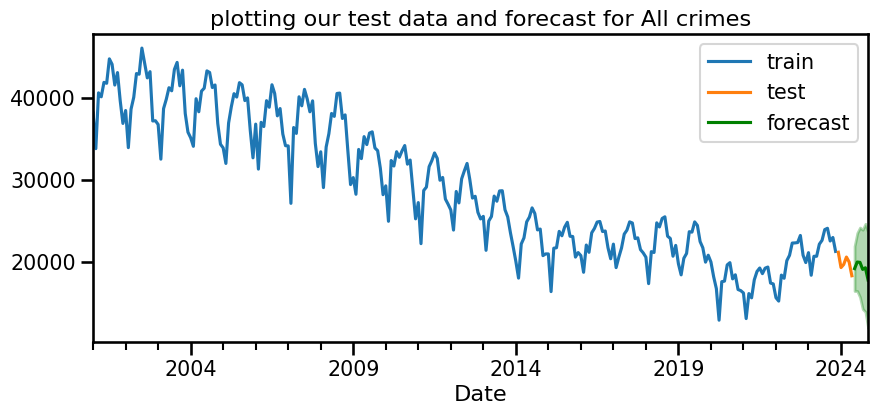

In [ ]:
plot_forecast(train_all,test_all,forecast_df_all, title = 'plotting our test data and forecast for All crimes');


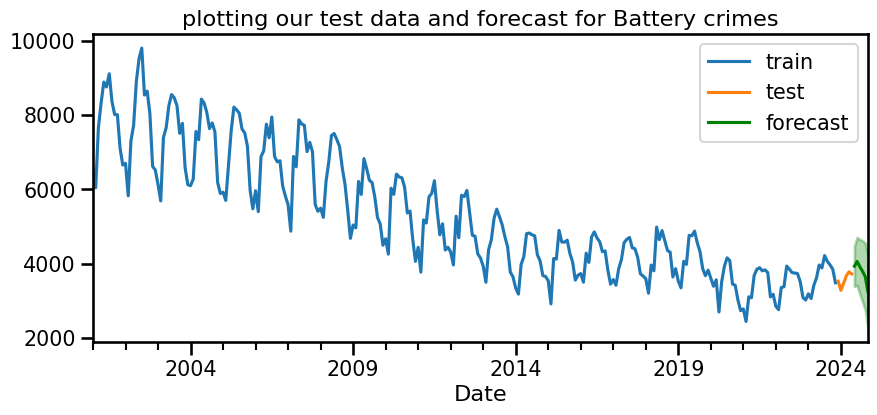

In [ ]:
plot_forecast(train,test,forecast_df_2, title = 'plotting our test data and forecast for Battery crimes');